# Averaged Artifact Substraction with EEG Data
## First step prepare Jupyter Notebook

In [39]:
import os
from facet.facet import facet
from loguru import logger
import sys


eegDataSet_filepath = "./datasets/NiazyFMRI.edf"

# defining important parameters
upsampling_factor = 10
artifact_to_trigger_offset_seconds = -0.005
regex_trigger_event_filter = (
    r"\b1\b"  # Events with the value 1 are considered as triggers
)
unwanted_bad_channels = [
    "EKG",
    "EMG",
    "EOG",
    "ECG",
]  # Channels with these names are considered as bad channels and not considered in the processing
evaluation_measures = ["SNR", "RMS", "RMS2", "MEDIAN"]

f = facet()

## Second Step import EEG Data

2025-03-19 18:26:22.658 | INFO     | facet.facet:import_eeg:33 - Importing EEG from ./datasets/NiazyFMRI.edf
2025-03-19 18:26:22.690 | DEBUG    | facet.frameworks.analysis:import_eeg:112 - Importing EEG with:
2025-03-19 18:26:22.690 | DEBUG    | facet.frameworks.analysis:import_eeg:113 - Channels ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']
2025-03-19 18:26:22.690 | DEBUG    | facet.frameworks.analysis:import_eeg:114 - Time Start: 0.0s
2025-03-19 18:26:22.691 | DEBUG    | facet.frameworks.analysis:import_eeg:115 - Time End: 162.99951171875s
2025-03-19 18:26:22.691 | DEBUG    | facet.frameworks.analysis:import_eeg:116 - Number of Samples: 333824
2025-03-19 18:26:22.691 | DEBUG    | facet.frameworks.analysis:import_eeg:117 - Sampling Frequency: 2048.0Hz
2025-03-19 18:26:22.691 | DEBUG    | facet.frameworks.analysis:im

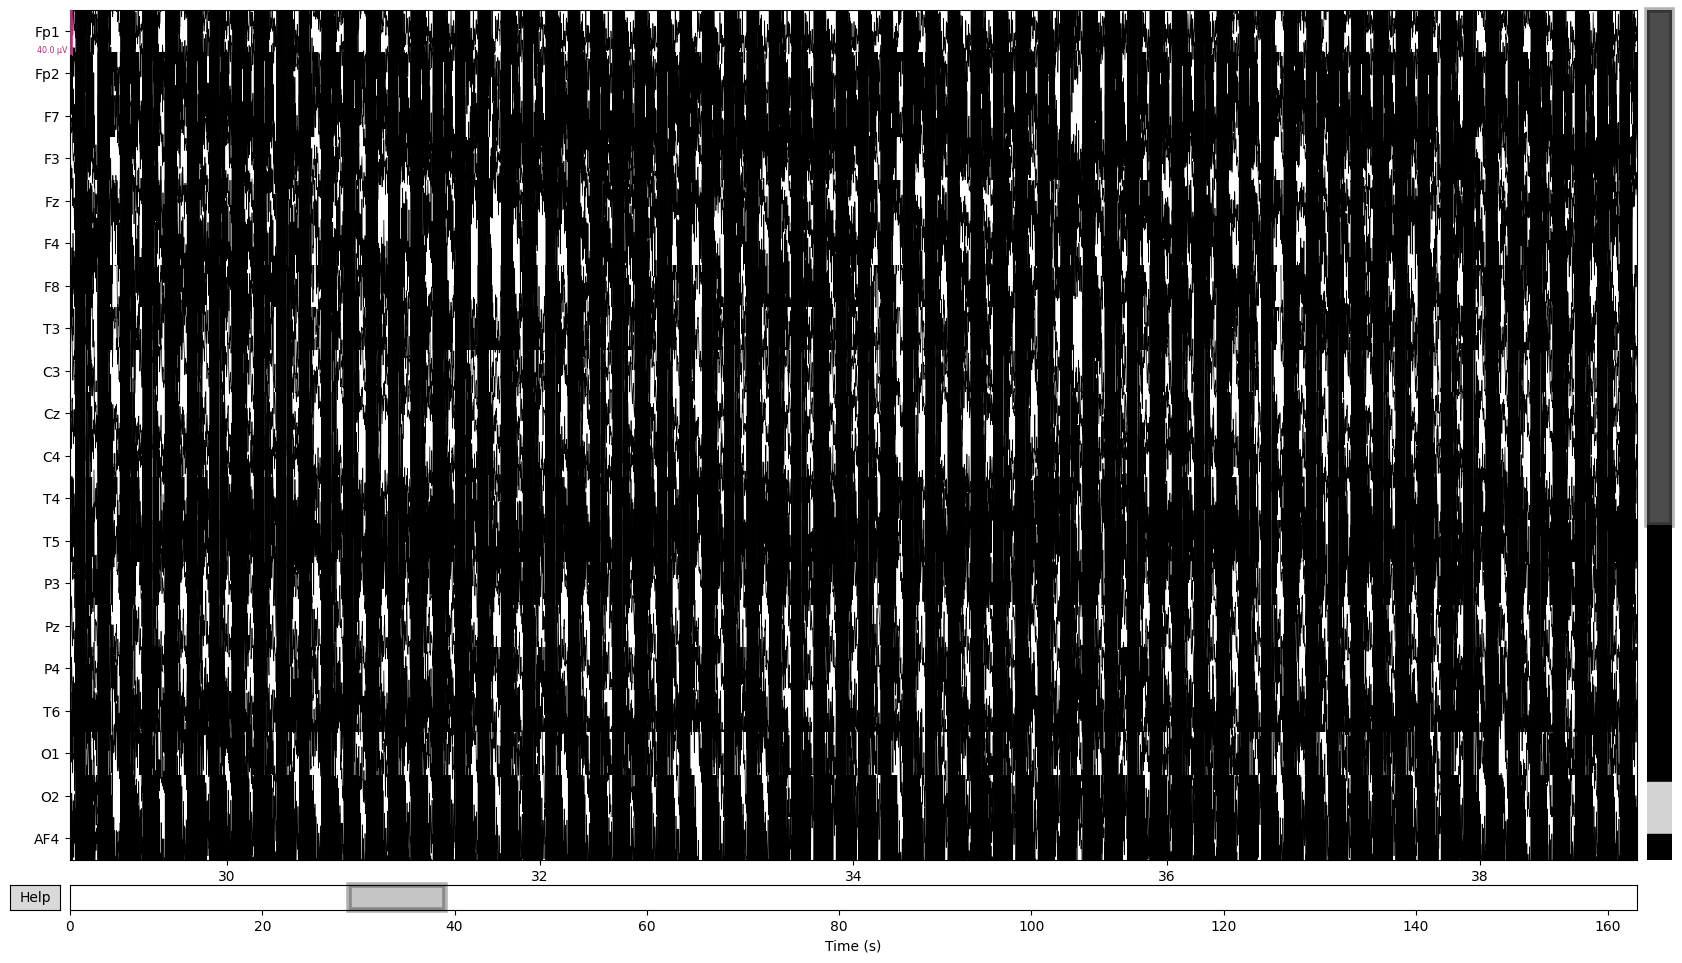

In [40]:
f.import_eeg(
    eegDataSet_filepath,
    artifact_to_trigger_offset=artifact_to_trigger_offset_seconds,
    upsampling_factor=upsampling_factor,
    bads=unwanted_bad_channels,
)
f.plot_eeg(title="after import", start=29)

## Third Step Preprocessing

In [41]:
f.get_eeg().mne_raw.crop(0, 162)  # Crop because the edf has bad data samples at the end
f.get_correction().filter(l_freq=0.5)
f.get_correction().upsample()

2025-03-19 18:26:23.835 | DEBUG    | facet.frameworks.correction:filter:873 - Applying filter with l_freq=0.5 and h_freq=None
2025-03-19 18:26:23.956 | INFO     | facet.frameworks.correction:upsample:857 - Upsampling Data


## Fourth Step find triggers

In [42]:
f.find_triggers(regex_trigger_event_filter)  # Using Niazys data
f.align_triggers(0)
f.align_subsample(0)
results_preprocessed = f.evaluate(f.get_eeg(), measures=evaluation_measures, name="Preprocessed")
f.get_analysis().print_analytics()

2025-03-19 18:26:27.289 | INFO     | facet.facet:find_triggers:74 - finding triggers
2025-03-19 18:26:27.290 | DEBUG    | facet.frameworks.analysis:find_triggers:180 - Stim-Kanäle gefunden:
2025-03-19 18:26:27.302 | DEBUG    | facet.frameworks.analysis:find_triggers:202 - Found 840 triggers
2025-03-19 18:26:27.642 | INFO     | facet.facet:find_triggers:77 - Found 840 triggers
2025-03-19 18:26:27.643 | DEBUG    | facet.frameworks.correction:align_triggers:421 - Aligning triggers
2025-03-19 18:26:28.276 | INFO     | facet.frameworks.correction:align_subsample:637 - Aligning subsamples
2025-03-19 18:26:28.277 | DEBUG    | facet.frameworks.correction:align_subsample:648 - Aligning subsamples for Channel 0:Fp1
2025-03-19 18:26:28.278 | DEBUG    | facet.frameworks.correction:_align_subsample:672 - Initial filter setup
2025-03-19 18:26:30.662 | DEBUG    | facet.frameworks.correction:align_subsample:648 - Aligning subsamples for Channel 1:Fp2
2025-03-19 18:26:30.859 | DEBUG    | facet.framewor

## Fourth step apply AAS

In [43]:
f.calc_matrix_aas()

2025-03-19 18:26:37.680 | INFO     | facet.facet:calc_matrix_aas:94 - Calculating matrix with allen et al. averaging method numpy
2025-03-19 18:26:37.760 | DEBUG    | facet.frameworks.correction:calc_matrix_aas:258 - Averaging Channel 0:Fp1
2025-03-19 18:26:37.779 | DEBUG    | facet.frameworks.correction:calc_matrix_aas:258 - Averaging Channel 1:Fp2
2025-03-19 18:26:37.798 | DEBUG    | facet.frameworks.correction:calc_matrix_aas:258 - Averaging Channel 2:F7
2025-03-19 18:26:37.816 | DEBUG    | facet.frameworks.correction:calc_matrix_aas:258 - Averaging Channel 3:F3
2025-03-19 18:26:37.835 | DEBUG    | facet.frameworks.correction:calc_matrix_aas:258 - Averaging Channel 4:Fz
2025-03-19 18:26:37.853 | DEBUG    | facet.frameworks.correction:calc_matrix_aas:258 - Averaging Channel 5:F4
2025-03-19 18:26:37.872 | DEBUG    | facet.frameworks.correction:calc_matrix_aas:258 - Averaging Channel 6:F8
2025-03-19 18:26:37.891 | DEBUG    | facet.frameworks.correction:calc_matrix_aas:258 - Averaging C

{0: array([[0.03333333, 0.03333333, 0.03333333, ..., 0.        , 0.        ,
         0.        ],
        [0.03333333, 0.03333333, 0.03333333, ..., 0.        , 0.        ,
         0.        ],
        [0.03333333, 0.03333333, 0.03333333, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.03333333, 0.03333333,
         0.03333333],
        [0.        , 0.        , 0.        , ..., 0.03333333, 0.03333333,
         0.03333333],
        [0.        , 0.        , 0.        , ..., 0.03333333, 0.03333333,
         0.03333333]]),
 1: array([[0.03333333, 0.03333333, 0.03333333, ..., 0.        , 0.        ,
         0.        ],
        [0.03333333, 0.03333333, 0.03333333, ..., 0.        , 0.        ,
         0.        ],
        [0.03333333, 0.03333333, 0.03333333, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.03333333, 0.03333333,
         0.03333333],
      

## Fifth step Remove Artifacts

In [44]:
f.remove_artifacts()

2025-03-19 18:26:38.339 | DEBUG    | facet.frameworks.correction:calc_avg_artifact:118 - Calculating Average Artifacts
2025-03-19 18:26:38.340 | DEBUG    | facet.frameworks.correction:calc_avg_artifact:145 - Calculating Artifact for Channel 0:Fp1
2025-03-19 18:26:38.366 | DEBUG    | facet.frameworks.correction:calc_avg_artifact:145 - Calculating Artifact for Channel 1:Fp2
2025-03-19 18:26:38.400 | DEBUG    | facet.frameworks.correction:calc_avg_artifact:145 - Calculating Artifact for Channel 2:F7
2025-03-19 18:26:38.440 | DEBUG    | facet.frameworks.correction:calc_avg_artifact:145 - Calculating Artifact for Channel 3:F3
2025-03-19 18:26:38.477 | DEBUG    | facet.frameworks.correction:calc_avg_artifact:145 - Calculating Artifact for Channel 4:Fz
2025-03-19 18:26:38.511 | DEBUG    | facet.frameworks.correction:calc_avg_artifact:145 - Calculating Artifact for Channel 5:F4
2025-03-19 18:26:38.542 | DEBUG    | facet.frameworks.correction:calc_avg_artifact:145 - Calculating Artifact for Cha

## Sixth step Post-Processing

In [45]:
f.get_correction().apply_PCA()
f.get_correction().downsample()
f.get_correction().filter(h_freq=70)
f.get_correction().apply_ANC()

2025-03-19 18:26:40.009 | DEBUG    | facet.frameworks.correction:apply_PCA:541 - applying PCA
2025-03-19 18:26:40.010 | DEBUG    | facet.frameworks.correction:apply_PCA:552 - Applying PCA to Channel 0:Fp1
2025-03-19 18:26:40.871 | DEBUG    | facet.frameworks.correction:apply_PCA:552 - Applying PCA to Channel 1:Fp2
2025-03-19 18:26:41.919 | DEBUG    | facet.frameworks.correction:apply_PCA:552 - Applying PCA to Channel 2:F7
2025-03-19 18:26:42.898 | DEBUG    | facet.frameworks.correction:apply_PCA:552 - Applying PCA to Channel 3:F3
2025-03-19 18:26:43.938 | DEBUG    | facet.frameworks.correction:apply_PCA:552 - Applying PCA to Channel 4:Fz
2025-03-19 18:26:44.967 | DEBUG    | facet.frameworks.correction:apply_PCA:552 - Applying PCA to Channel 5:F4
2025-03-19 18:26:45.977 | DEBUG    | facet.frameworks.correction:apply_PCA:552 - Applying PCA to Channel 6:F8
2025-03-19 18:26:47.042 | DEBUG    | facet.frameworks.correction:apply_PCA:552 - Applying PCA to Channel 7:T3
2025-03-19 18:26:48.092 

## Seventh display the processed eeg data

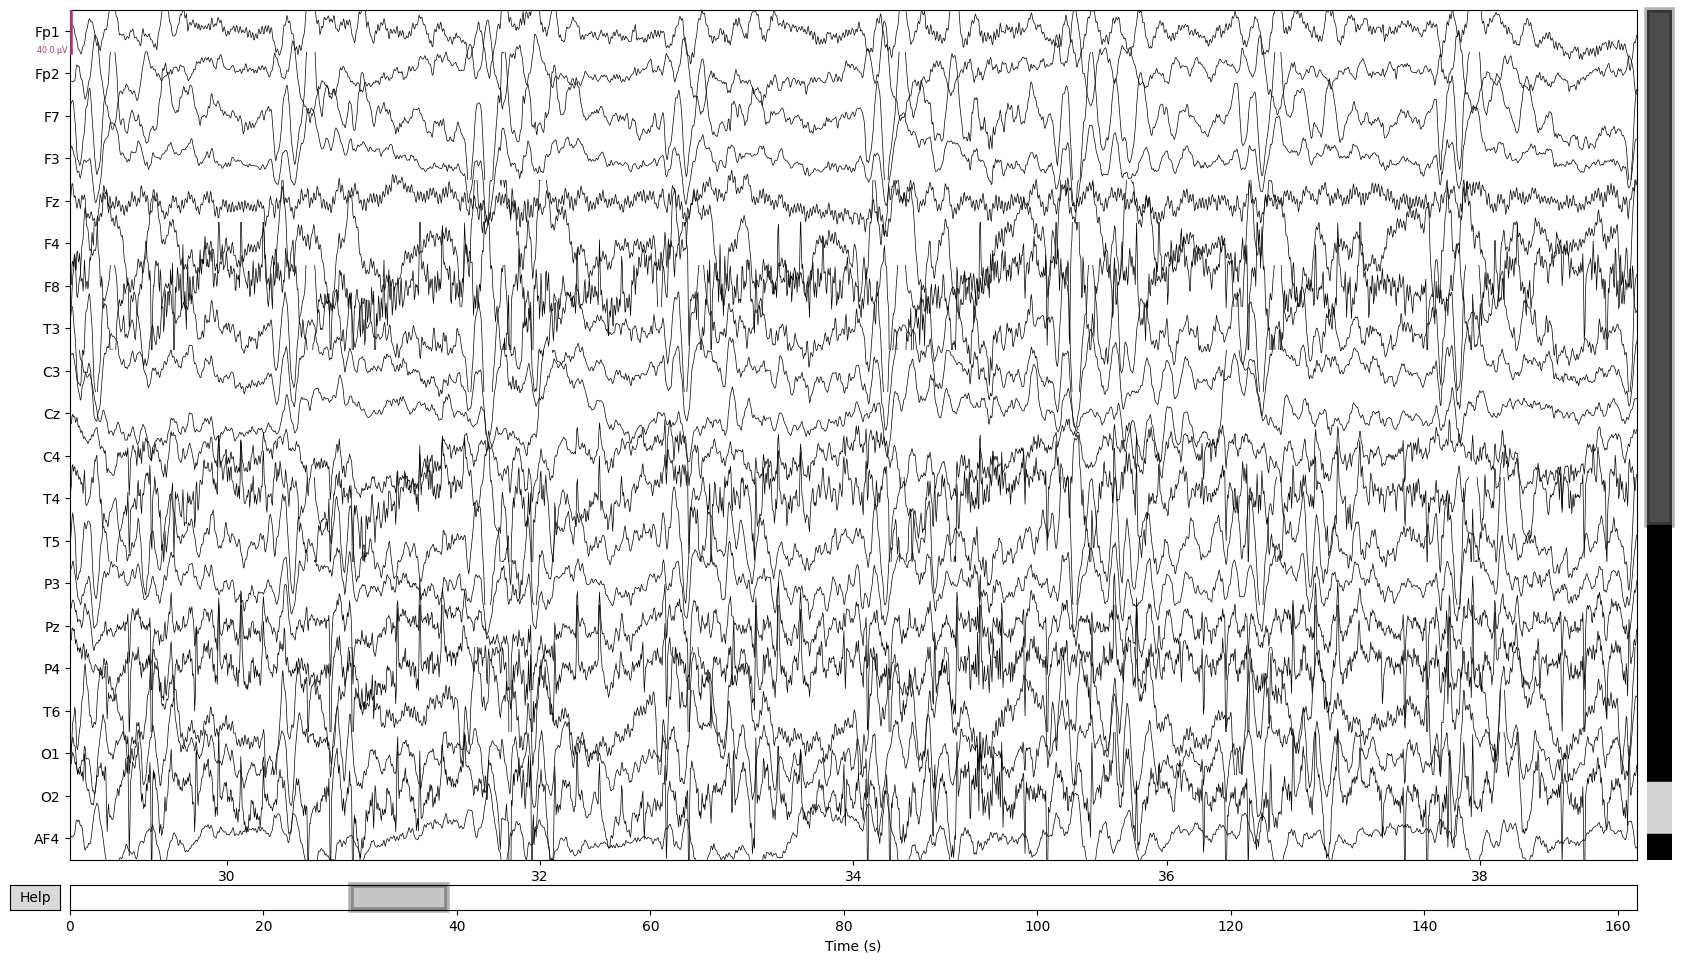

In [46]:
f.plot_eeg(title="after post-processing", start=29)

## Eighth Evaluate Results

2025-03-19 18:27:22.495 | INFO     | facet.facet:evaluate:151 - Evaluating...
2025-03-19 18:27:22.496 | DEBUG    | facet.frameworks.evaluation:evaluate:51 - Channels that will be evaluated: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2', 'AF4', 'AF3', 'FC2', 'FC1', 'CP1', 'CP2', 'PO3', 'PO4', 'FC6', 'FC5', 'CP5', 'EMG', 'ECG', 'Status']


{'name': 'corrected', 'SNR': 12.362273632398901, 'RMS': 67.00816153274896, 'RMS2': 1.072265085942008, 'MEDIAN': 5.757371091062876e-05}


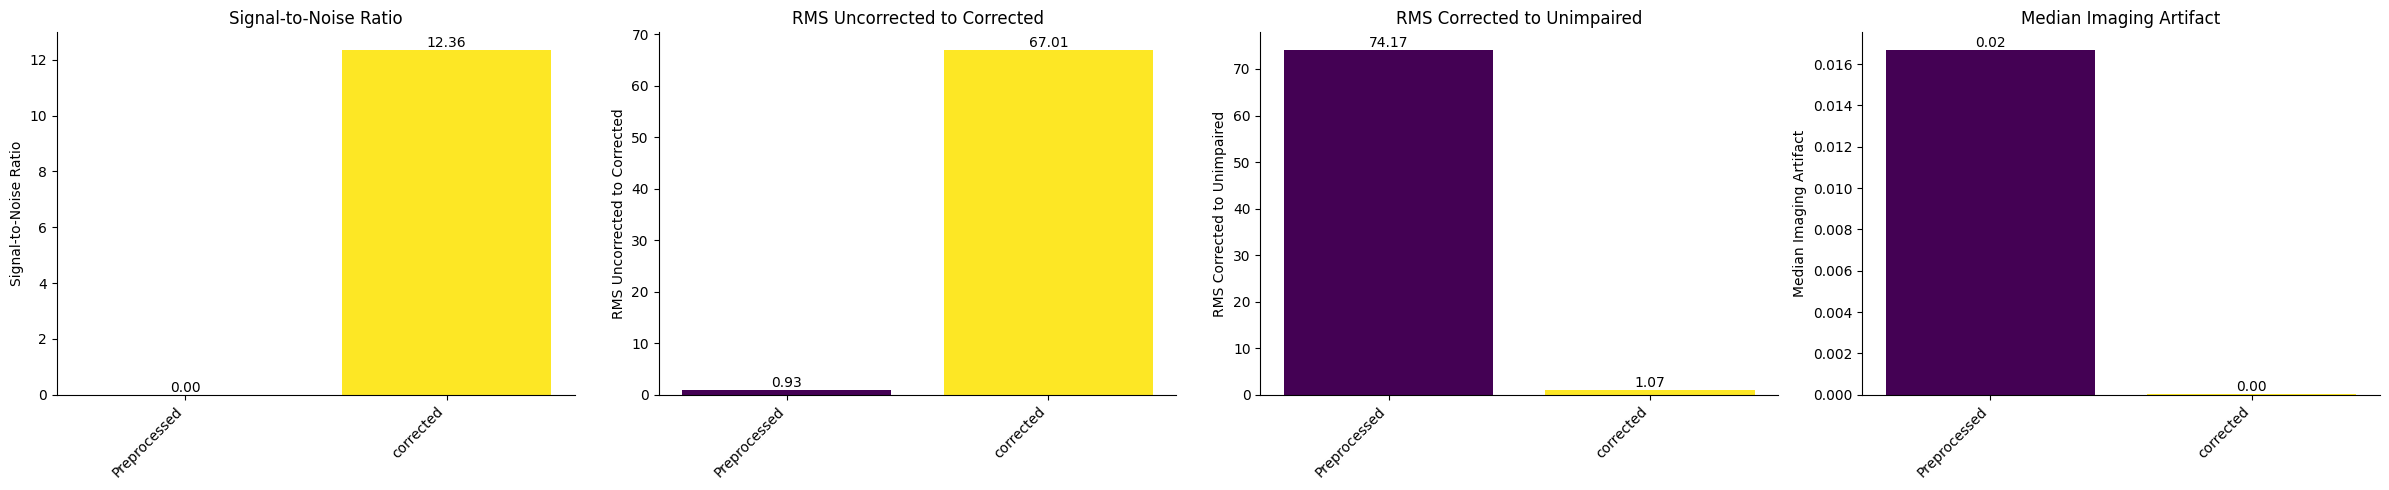

In [47]:
results_numpy_matrix= f.evaluate(f.get_eeg(), name="corrected", measures = evaluation_measures)
print(results_numpy_matrix)
f.plot([results_preprocessed,results_numpy_matrix], plot_measures=evaluation_measures)
f.export_eeg('export.edf');

# Each step again for QRS correction

2025-03-19 18:27:24.785 | DEBUG    | facet.frameworks.correction:filter:873 - Applying filter with l_freq=0.5 and h_freq=None
2025-03-19 18:27:25.061 | INFO     | facet.frameworks.correction:upsample:857 - Upsampling Data


Stage 1 of 5: Adaptive threshold peak detection.
....25% ....50% ....75% ....Stage 2 of 5: Correcting for False Positive detection.
...25% ...50% ...75% ...100%
Stage 3 of 5: Aligning QRS Peaks (1)
..........25% ............50% ...........75% ............Stage 4 of 5: Correcting for False Negative detection.
...25% ...50% ...75% ...100%
Stage 5 of 5: Aligning QRS Peaks (2)
..........25% ............50% ...........75% ............

2025-03-19 18:27:33.621 | DEBUG    | facet.frameworks.analysis:find_triggers_qrs:239 - Found 129 peaks
2025-03-19 18:27:33.622 | DEBUG    | facet.frameworks.analysis:find_triggers_qrs:240 - Loading events...
2025-03-19 18:27:33.625 | DEBUG    | facet.frameworks.analysis:find_triggers_qrs:261 - Deriving parameters...
2025-03-19 18:27:33.626 | WARNING  | facet.frameworks.analysis:find_triggers_qrs:266 - 0.67578125
2025-03-19 18:27:33.638 | DEBUG    | facet.frameworks.correction:align_triggers:421 - Aligning triggers
2025-03-19 18:27:33.899 | INFO     | facet.facet:calc_matrix_aas:94 - Calculating matrix with allen et al. averaging method numpy
2025-03-19 18:27:34.074 | WARNING  | facet.frameworks.correction:calc_matrix_aas:252 - Number of epochs is not equal to the number of triggers. Please check your data. Imcomplete data?
2025-03-19 18:27:34.075 | DEBUG    | facet.frameworks.correction:calc_matrix_aas:258 - Averaging Channel 0:Fp1
2025-03-19 18:27:34.095 | DEBUG    | facet.frameworks.

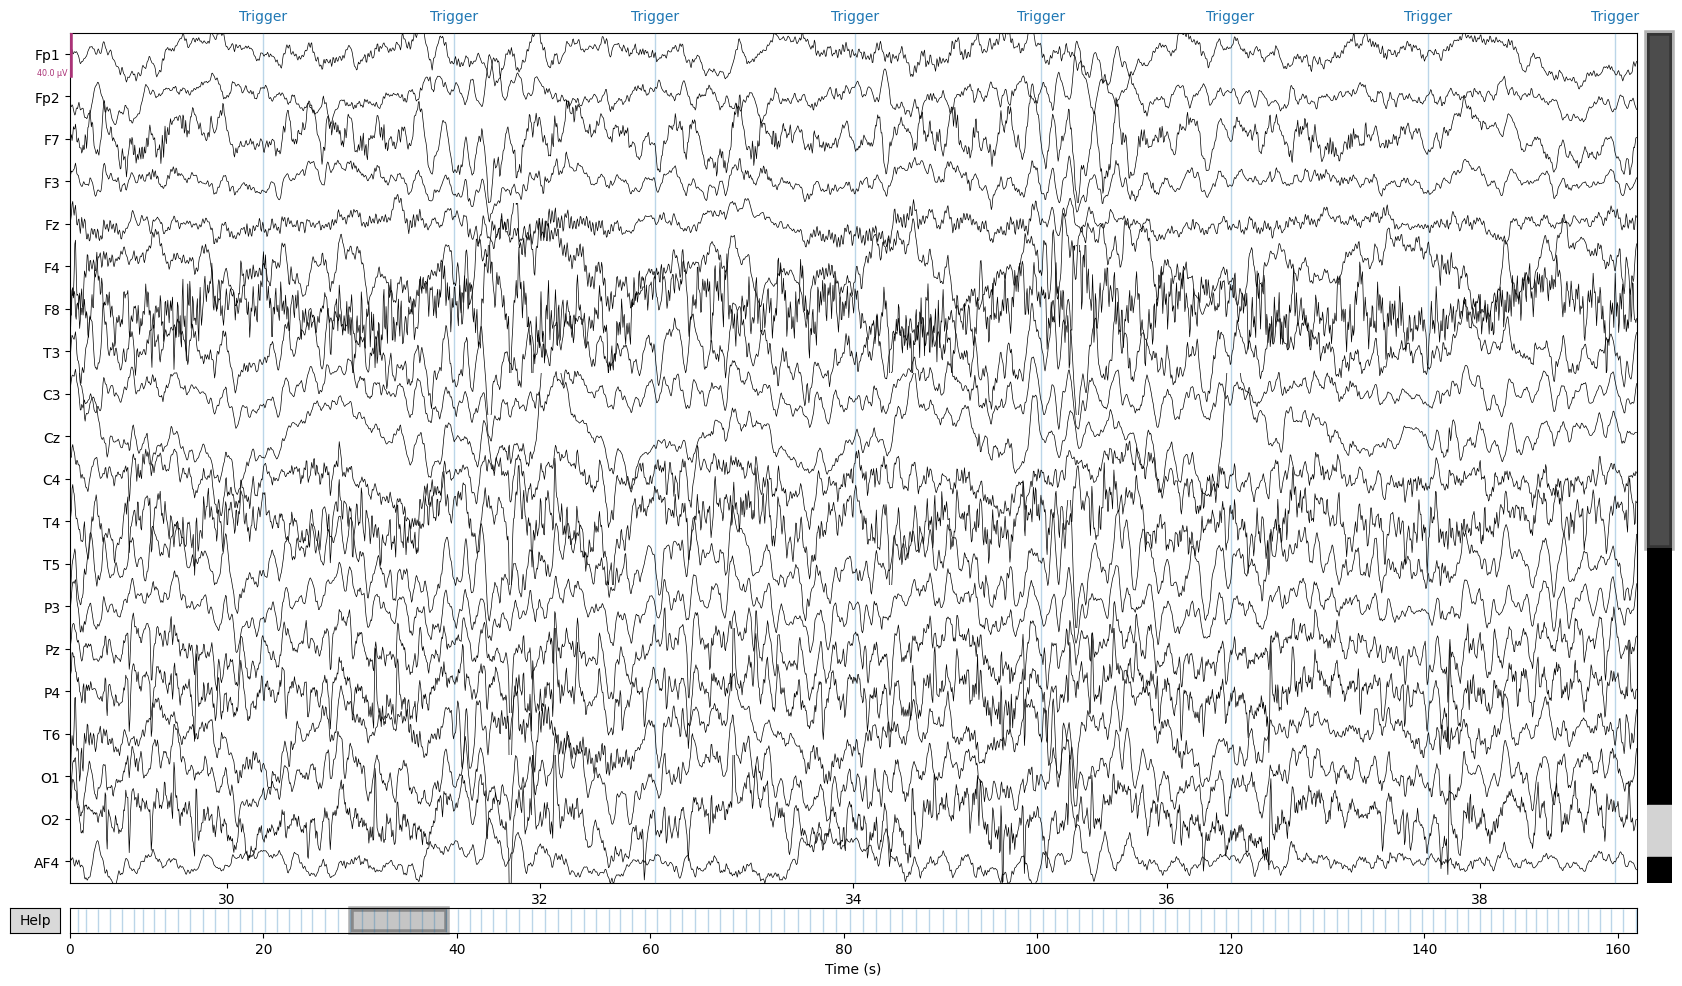

In [48]:
f.pre_processing()
# Now find QRS triggers
f.get_analysis().find_triggers_qrs(True)
f.align_triggers(0)
f.calc_matrix_aas()
f.remove_artifacts(plot_artifacts=False)
f.get_correction().apply_PCA()
f.post_processing()
f.plot_eeg(start=29)
f.export_eeg('processed_eeg_qrs_corrected_file.edf')